In [1]:
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[3])
sys.path.append(parent_dir)

from src.utils.plot import use_svg_display

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

use_svg_display()

# Concept

```{contents}
```

This section details the linear regression model from a probabilistic perspective.

## Intuition

As a running example, suppose that we wish
to estimate the prices of houses (in dollars)
based on their area (in square feet) and age (in years).
To develop a model for predicting house prices,
we need to get our hands on data consisting of sales,
including the sales price, area, and age for each home.
In the terminology of machine learning,
the dataset is called a *training dataset* or *training set*,
and each row (containing the data corresponding to one sale)
is called an *example* (or *data point*, *instance*, *sample*).
The thing we are trying to predict (price)
is called a *label* (or *target*).
The variables (age and area)
upon which the predictions are based
are called *features* (or *covariates*) {cite}`zhang2021dive`.

Let's create a housing dataset below with $100$ samples.

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random data for the features and the target variable
n_samples = 100
house_size = np.random.randint(100, size=n_samples)
age = np.random.randint(50, size=n_samples)
price = 100000 + 1000 * house_size + 500 * age + np.random.normal(0, 10000, size=n_samples)
price = price.astype(int)

# Create a Pandas DataFrame to store the data
data = pd.DataFrame({'House Size (sqft)': house_size, 'Age (years)': age, 'Price ($)': price})

# Print the first few rows of the DataFrame
display(data)

,House Size (sqft),Age (years),Price ($)
0,51,25,163551
1,92,24,201654
2,14,44,121846
3,71,40,186793
4,60,28,170572
...,...,...,...
95,84,0,171542
96,79,26,193731
97,81,12,190853
98,52,40,163161


The goal is to predict the price of a house given its size. We can visualize the
relationship between the house size and the price using a scatter plot.

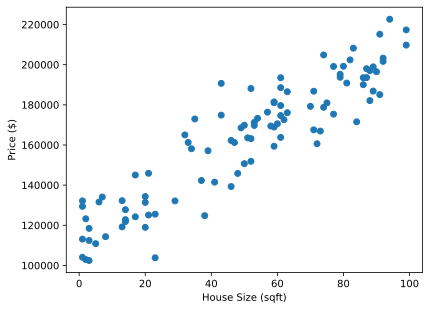

In [3]:
plt.scatter(data['House Size (sqft)'], data['Price ($)'])
plt.xlabel('House Size (sqft)')
plt.ylabel('Price ($)')
plt.show()

### Univariate Linear Model

Let's try to model the relationship between the house size (sqft) and the price ($). The assumption of linearity means that the expected value of the target (price) can be expressed as a
linear function of the feature (sqft).

$$
\text{price} = \beta_0 + \beta_1 \cdot \text{sqft} \iff y = \beta_0 + \beta_1 x
$$ (eq_price-area)

where $\beta_0$ is the intercept, $\beta_1$ the coefficient, $x$ the feature (sqft) and $y$ the target (price).

Here the coefficient $\beta_1$ is called the *weights* and the intercept $\beta_0$ is called the *bias*.

The weights determine the influence of each feature on our prediction, this means that
a larger weight indicates that the feature is more important for predicting the target.

The bias determines the value of the estimate when all features are zero. Why do we need this?
Will there ever be a case where the house size (sqft) is $0$? No, but we still need the bias because it allows us
to express the functional/hypothesis space of linear functions (more on that later). Intuitively,
if there is no bias, the equation will always pass through the origin, which means that the model
can never vary up or down.

```{prf:remark} Why do we need a bias?
:label: prf:remark-bias

If there is no bias term in the model, you will lose the flexibility of your model. Imagine a simple linear regression model without a bias term, then your linear equation $y=mx$ will only pass through the origin. Therefore, if your underlying data (pretend that we know that the underlying data's actual function $y = 3x + 5$), then your Linear Regression model will never find the "best fit line" simply because we already assume that our prediction is governed by the slope $m$, and there does not exist our $c$, the intercept/bias term.
```

Therefore, it is usually the case whereby we always add in an intercept term. We intend to estimate the values of $y$ ***given*** $x$. Each value of $x$ is multiplied by $\beta_{1}$, with a constant intercept term $\beta_{0}$. We also note that $1$ unit increase in $x$ will correspond to a $\beta_1$ unit increase in $y$ according to the model, while always remebering to add the intercept term.

The equation {eq}`eq_price-area` is an [**affine transformation**](https://en.wikipedia.org/wiki/Affine_transformation) of the input features. The difference between an affine transformation and a linear transformation is that an affine transformation has a translation (bias) component. In other words,
an affine transformation is a linear transformation combined with a translation.

Our goal is to choose
the weights $\beta_1$ and the bias $\beta_0$ such that, on average, make our model's predictions
fit the true prices observed in the data as closely as possible {cite}`zhang2021dive`.
This also means being able to extrapolate to new data points that were not part of the training set.

### Multivariate Linear Model

To add to the previous example, let's say that we want to predict the price of a house given its size and age.

$$
\text{price} = \beta_0 + \beta_1 \cdot \text{sqft} + \beta_2 \cdot \text{age} \iff y = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$ (eq_price-area-age)

where $\beta_0$ is the intercept, $\beta_1$ and $\beta_2$ the coefficients, $x_1$ and $x_2$ the features (sqft and age) and $y$ the target (price).

Then our task is to find the best values for the weights $\beta_1$ and $\beta_2$ and the bias $\beta_0$ such that the model's predictions are as close as possible to the true prices observed in the data.

### The Hypothesis Space

As with any machine learning problem, we need to define a hypothesis space $\mathcal{H}$, which is the set of all possible models that we consider. In the case of linear regression, the hypothesis space is the set of all possible linear functions.

$$
\mathcal{H} = \{ h \in \mathbb{R}^{D} \rightarrow \mathbb{R} \mid h(\mathbf{x}) = \mathbf{\beta}^T \mathbf{x} + b \}
$$

where $\mathbf{x} \in \mathbb{R}^{D}$ is the input vector, $\mathbf{\beta} \in \mathbb{R}^n$ is the weight vector, $b \in \mathbb{R}$ is the bias, and $h$ is the hypothesis function.

We will explain them in more detail in the next few sections.

### The Loss Function

The loss

$$
\mathcal{L}
$$

and via the ERM framework we deal with empirical loss

$$
\widehat{\mathcal{L}}
$$

and choose a hypothesis $h$ learned by the algorithm $\mathcal{A}$:

$$
\begin{aligned}
& \widehat{h} \in \underset{h \in \mathcal{H}}{\operatorname{argmin}} \widehat{L}(h \mid \mathcal{S}) \\
& \stackrel{(2.16)}{=} \underset{h \in \mathcal{H}}{\operatorname{argmin}}(1 / m) \sum_{i=1}^m L\left(\left(\mathbf{x}^{(i)}, y^{(i)}\right), h\right) .
\end{aligned}
$$

## notation + formulation



## Problem Formulation



## Hypothesis Space

## Loss

Remember to put $\mathcal{L}(\boldsymbol{\theta})$ somewhere to indicate that the loss is a function of the parameters $\boldsymbol{\theta}$.